# Trabajo Practico Espacial - Grupo 5

Integrantes:
- Fernandez Lema Brisa
- Ramos Lautaro
- Knudsen Benjamín

---
Set: Accidentes viales en autopistas (Buenos Aires, 2022) - Registro de siniestros en AUSA

Importamos las librerias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns

Creamos el DataFrame a partir del archivo CSV.

In [2]:
# abrimos el archivo usando una función específica de pandas
raw_dataset = pd.read_csv("siniestros-2022.csv", encoding="latin-1", sep=";")

In [3]:
# Imprimimos las columnas de dataset
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   FECHA                       477 non-null    object
 1   HORA                        477 non-null    int64 
 2   AUTOPISTA                   477 non-null    object
 3   BANDA y/o RAMAL             477 non-null    object
 4   PK                          477 non-null    object
 5   CONDICIONES METEOROLÓGICAS  477 non-null    object
 6   SUPERFICIE DE LA VIA        477 non-null    object
 7   LESIONADOS                  477 non-null    int64 
 8   FALLECIDOS                  477 non-null    int64 
 9   TIPO DE SINIESTRO           477 non-null    object
 10  MOTO                        477 non-null    int64 
 11  LVIANO                      477 non-null    int64 
 12  BUS                         477 non-null    int64 
 13  CAMION                      477 non-null    int64 

Inicialmente el dataset parece no tener valores nulos!

## Análisis exploratorio inicial

In [4]:
# Copiamos el conjunto para preservarlo
preprocessed_dataset = raw_dataset.copy()

# Corregimos el nombre de la columna "LVIANO"
preprocessed_dataset = preprocessed_dataset.rename(columns={"LVIANO": "LIVIANO"})


Al realizar una busqueda de valores nulos para cada columna, nos encontramos con que la columnas "BANDA y/o RAMAL" y "PK" tienen valores nulos.

In [5]:
# imprimimos las frecuencias absolutas de cada valor de la columna BANDA y/o RAMAL
preprocessed_dataset['BANDA y/o RAMAL'].value_counts()

BANDA y/o RAMAL
DESCENDENTE            236
ASCENDENTE             222
RAMAL DE ENLACE          9
DIST. SUR - RAMAL 1      2
RAMAL 2 BIS              2
RAMAL 11                 2
RAMAL DE EGRESO          1
-                        1
DIST. SUR - RAMAL 2      1
RAMAL 3                  1
Name: count, dtype: int64

In [6]:
# imprimimos las frecuencias absolutas de cada valor de la columna PK
preprocessed_dataset['PK'].value_counts()

PK
-       18
5400    15
3500    14
4500    14
2500    13
        ..
6600     1
5800     1
700      1
6800     1
7100     1
Name: count, Length: 96, dtype: int64

A su vez la columna "PK" esta almacenada como Strings pero seria mas apropiado que se almacene en forma de un entero.

In [7]:
#COLUMNA PK:
# 1. Reemplazamos el valor '-' por un nulo (NaN) de NumPy
preprocessed_dataset['PK'] = preprocessed_dataset['PK'].replace('-', np.nan)
# 2. Ahora que no hay guiones, convertimos la columna a tipo numérico (Int64)
preprocessed_dataset['PK'] = preprocessed_dataset['PK'].astype('Int64')

#COLUMNA BANDA y/o RAMAL:
# Reemplazamos el string '-' por el valor nulo np.nan en esa columna
preprocessed_dataset['BANDA y/o RAMAL'] = preprocessed_dataset['BANDA y/o RAMAL'].replace('-', np.nan)


---
## HIPÓTESIS UNIVARIADAS
### Hipotesis 1: AU 25 DE MAYO es la que reporta mayor cantidad de siniestros.

Para esta hipotesis vamos a tomar la columna de "AUTOPISTA" y vamos  contar la cantidad de siniestros que hay registrados en cada autopista. Graficandolo con un grafico de barras y sus correspondientes frecuencias relativas.

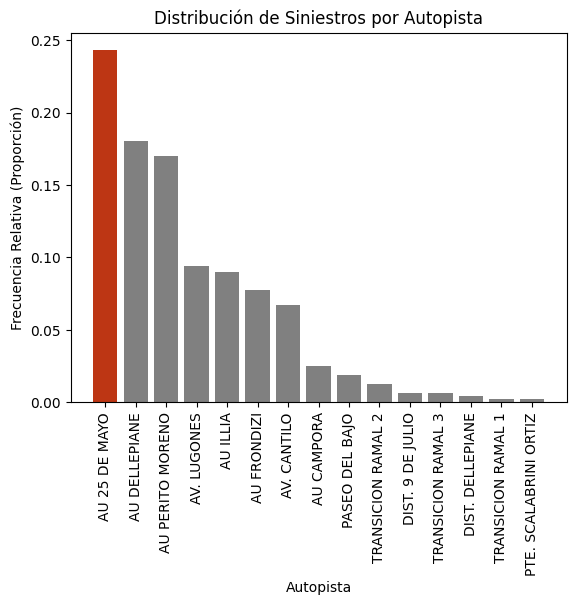

In [8]:
frecuencia_autopistas = preprocessed_dataset['AUTOPISTA'].value_counts(normalize=True)
max_value = frecuencia_autopistas.max()

# Creamos el gráfico de barras
colors = ['#BD3614' if valor == max_value else 'gray' for valor in frecuencia_autopistas.values]
plt.bar(frecuencia_autopistas.index, frecuencia_autopistas.values, color=colors)

# Agregamos las etiquetas a los ejes
plt.xlabel('Autopista')
plt.ylabel('Frecuencia Relativa (Proporción)')

# Agregamos un título al gráfico
plt.title('Distribución de Siniestros por Autopista')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar el gráfico
plt.show()

Hacemos el mismo grafico de barras pero con las frecuencias absolutas...

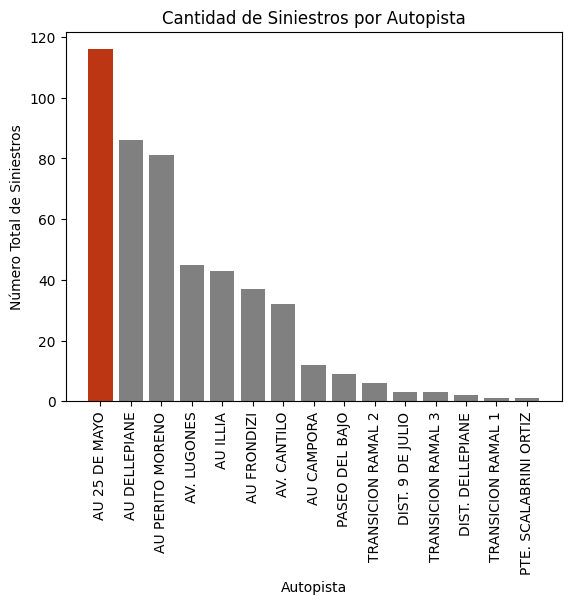

In [9]:
frecuencia_autopistas = preprocessed_dataset['AUTOPISTA'].value_counts(normalize=False)
max_value = frecuencia_autopistas.max()
# Crear el gráfico de barras
colors = ['#BD3614' if valor == max_value else 'gray' for valor in frecuencia_autopistas.values] #Podria ser gray o steelblue
plt.bar(frecuencia_autopistas.index, frecuencia_autopistas.values, color=colors)

# Agregar etiquetas a los ejes
plt.xlabel('Autopista')
plt.ylabel('Número Total de Siniestros')

# Agregar un título al gráfico
plt.title(f'Cantidad de Siniestros por Autopista')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar el gráfico
plt.show()

### Hipotesis 2: La mayor cantidad de siniestros ocurre entre las 6 y las 8 de la mañana.

Similar a la hipotesis 1, contamos para cada valor de la columna "HORA" la cantidad de siniestros que hubo, para luego representarlos con un grafico de tendencia.

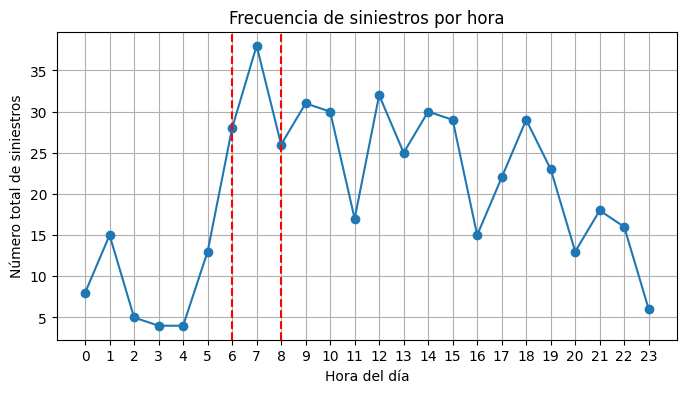

In [10]:
# Calculamos la frecuencia de siniestros por hora
frecuencia_horario = preprocessed_dataset['HORA'].value_counts().sort_index()

# Creamos un rango completo de horas 0–23
todas_las_horas = pd.Index(range(24), name='HORA')

# Reindexar para incluir todas las horas, con 0 donde no haya siniestros
frecuencia_horario = frecuencia_horario.reindex(todas_las_horas, fill_value=0)

# Creamos el gráfico
plt.figure(figsize=(8,4))
plt.plot(frecuencia_horario.index, frecuencia_horario.values, marker='o')

# Etiquetas y título
plt.xlabel('Hora del día')
plt.ylabel('Número total de siniestros')
plt.title('Frecuencia de siniestros por hora')

# Forzar que se muestren todas las horas en el eje X
plt.xticks(range(24))

# Marcamos el intervalo de interes 
plt.axvline(x=6, color='red', linestyle='--', label='Inicio Pico (6:00)')
plt.axvline(x=8, color='red', linestyle='--', label='Inicio Pico (8:00)')

# Cuadrícula y mostrar
plt.grid(True)
plt.show()

---
## HIPÓTESIS BIVARIADAS
### Hipotesis 3: La autopista con más siniestros tiende a registrar más LESIONADOS.

Armamos un diagrama de dispersión (scatter plot) para observar la relación entre el "Total de Siniestros" y el "Total de Lesionados", marcando cada punto con la variable "AUTOPISTA".

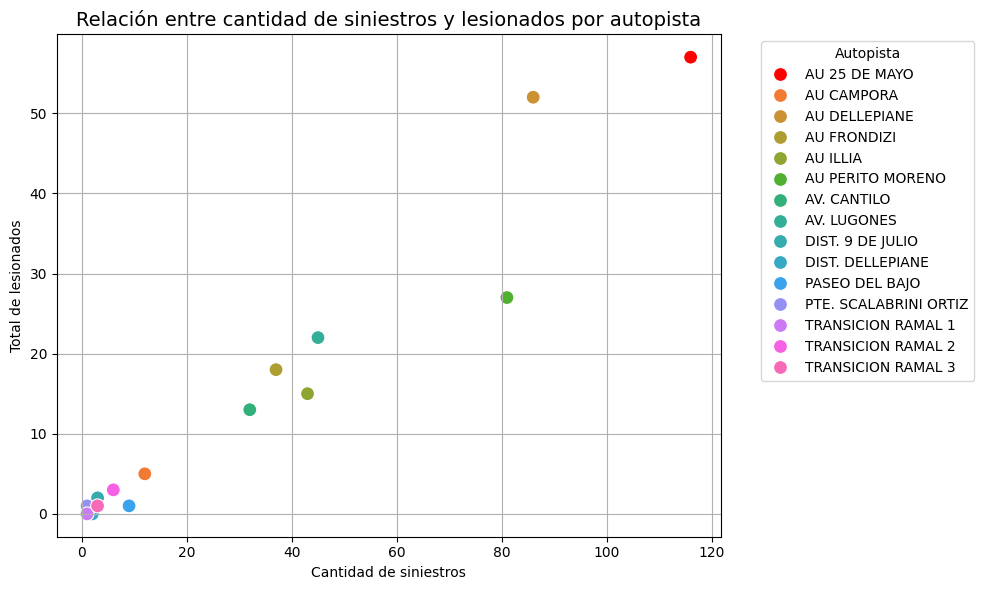

In [11]:
# Creamos un nuevo DataFrame "autopista_stats" donde agrupamos todos los siniestros por el nombre de la AUTOPISTA y, para cada autopista, calculamos el número total de siniestros y el número total de lesionados
autopista_stats = preprocessed_dataset.groupby('AUTOPISTA').agg(
    siniestros=('AUTOPISTA', 'count'),
    lesionados=('LESIONADOS', 'sum')
).reset_index()

# Lista de autopistas
autopistas = autopista_stats['AUTOPISTA'].unique()

# Crear una paleta de colores base (usamos una paleta de Seaborn)
base_colors = sns.color_palette("husl", len(autopistas))  # paleta de colores variados

# Asignar los colores a cada autopista
palette = dict(zip(autopistas, base_colors))

# Reemplazar el color de "AU 25 DE MAYO" por rojo
if "AU 25 DE MAYO" in palette:
    palette["AU 25 DE MAYO"] = "red"

# --- Visualización ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=autopista_stats,
    x='siniestros',
    y='lesionados',
    hue='AUTOPISTA',
    palette=palette,
    s=100
)

plt.title('Relación entre cantidad de siniestros y lesionados por autopista', fontsize=14)
plt.xlabel('Cantidad de siniestros')
plt.ylabel('Total de lesionados')
plt.legend(title='Autopista', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Calculamos la correlacion que hay entre las variables "Siniestros" y "LESIONADOS".

In [12]:
corr = autopista_stats['siniestros'].corr(autopista_stats['lesionados'])
print(f"Correlación entre siniestros y lesionados: {corr:.2f}")

Correlación entre siniestros y lesionados: 0.97


### Hipotesis 4: La probabilidad de colisión con más de dos vehículos aumenta en autopistas ascendentes durante horario pico.

En "bandas_dataset" vamos guardar unicamente las filas de "preprocessed_dataset" que en la columna "TIPO DE SINIESTRO" tenga "COLISION CON DOS O MAS VEHICULOS" y en la columna "BANDA y/o RAMAL" tengan "ASCENDENTE" o "DESCENDENTE", ya que el resto de valores de la columna "BANDA y/o RAMAL" tienen frecuencias esperadas muy bajas lo que violaria el supuesto. 

Hacemos un One Hot Encoding para indicar si la fila se encuentra dentro del horario pico.

Con "bandas_dataset" listo hacemos el test de Chi-Cuadrado.

In [13]:
# Definimos la lista de valores deseados
valores_deseados = ['ASCENDENTE', 'DESCENDENTE']

# Creamos las dos condiciones
condicion_1 = (preprocessed_dataset['TIPO DE SINIESTRO'] == 'COLISION CON DOS O MAS VEHICULOS')
condicion_2 = (preprocessed_dataset['BANDA y/o RAMAL'].isin(valores_deseados))

# Aplicamos ambas condiciones a la vez
bandas_dataset = preprocessed_dataset[condicion_1 & condicion_2].copy()

# One Hot Encoding horario pico, hora pico = 1.
bandas_dataset['HORA_PICO'] = np.where((bandas_dataset['HORA'] >= 6) & (bandas_dataset['HORA'] <= 8),1,0)

# Creamos la tabla de contingencia
contingency_table = pd.crosstab(bandas_dataset['BANDA y/o RAMAL'], bandas_dataset['HORA_PICO'])

print("Tabla de Contingencia (Observada):")
print(contingency_table)

# Ejecutamos el test
# g: Estadístico Chi2
# p: p-value
# dof: grados de libertad
# expected: la tabla de frecuencias esperadas
g, p, dof, expected = stats.chi2_contingency(contingency_table)

Tabla de Contingencia (Observada):
HORA_PICO          0   1
BANDA y/o RAMAL         
ASCENDENTE        93  35
DESCENDENTE      138  19


In [14]:
print(f"Estadístico Chi-Cuadrado: {g:.4f}")
print(f"Grados de libertad (dof): {dof}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("\nResultado: Significativo (p < 0.05)")
    print("Se rechaza la hipótesis nula. Hay una asociación entre BANDA y HORA_PICO.")
else:
    print("\nResultado: No significativo (p >= 0.05)")
    print("No se rechaza la hipótesis nula. Las variables parecen ser independientes.")

Estadístico Chi-Cuadrado: 9.6971
Grados de libertad (dof): 1
P-value: 0.0018

Resultado: Significativo (p < 0.05)
Se rechaza la hipótesis nula. Hay una asociación entre BANDA y HORA_PICO.


### Hipotesis 5: Existe una asociación estadísticamente significativa entre las condiciones meteorológicas y el tipo de siniestro.

Creamos un nuevo dataset, donde clasificamos la variable "TIPO DE SINIESTRO" en una nueva columna "TIPO_AGRUPADO" que puede tomar el valor "colision multiple" ó "siniestro unico". Y hamos lo mismo para la variable "CONDICIONES METEOROLÓGICAS" que la clasificamos en "CONDICION_AGRUPADA" como "buena" o "adversas".



In [15]:
Siniestro_dataset = preprocessed_dataset.copy()

# Funcion para clasificar la variable TIPO DE SINIESTRO en "siniestro unico" y "colision multiple"
def agrupar_tipo(siniestro):
    if siniestro == 'COLISION CON DOS O MAS VEHICULOS':
        return 'colision multiple'
    else:
        return 'siniestro unico'

Siniestro_dataset['TIPO_AGRUPADO'] = Siniestro_dataset['TIPO DE SINIESTRO'].apply(agrupar_tipo)

# Funcion para clasificar la variable CONDICIONES METEOROLÓGICAS en "buenas" y "adversas"
def agrupar_condicion(clima):
    if clima == 'BUENO':
        return 'buenas'
    else:
        return 'adversas' # Incluye LLUVIOSO, NIEBLA/BRUMA/HUMO

Siniestro_dataset['CONDICION_AGRUPADA'] = Siniestro_dataset['CONDICIONES METEOROLÓGICAS'].apply(agrupar_condicion)

Hacemos el test de chi-cuadrado

In [16]:
print("Tabla de Contingencia (Frecuencias Absolutas):\n")
contingencia = pd.crosstab(Siniestro_dataset['CONDICION_AGRUPADA'], Siniestro_dataset['TIPO_AGRUPADO'])
print(contingencia)


# Prueba Estadística (Test Chi-Cuadrado)

chi2, p_valor, dof, expected = chi2_contingency(contingencia)

print(f"Estadístico Chi-Cuadrado: {chi2:.4f}")
print(f"P-valor: {p_valor:.4f}")

alpha = 0.05
if p_valor < alpha:
    print("\nResultado: Se rechaza H0. Existe una asociación estadísticamente significativa.")
else:
    print("\nResultado: No se puede rechazar H0. Las variables son independientes.")

Tabla de Contingencia (Frecuencias Absolutas):

TIPO_AGRUPADO       colision multiple  siniestro unico
CONDICION_AGRUPADA                                    
adversas                            4               10
buenas                            285              178
Estadístico Chi-Cuadrado: 4.8869
P-valor: 0.0271

Resultado: Se rechaza H0. Existe una asociación estadísticamente significativa.


Armamos un grafico de barras con las frecuencias relativas.

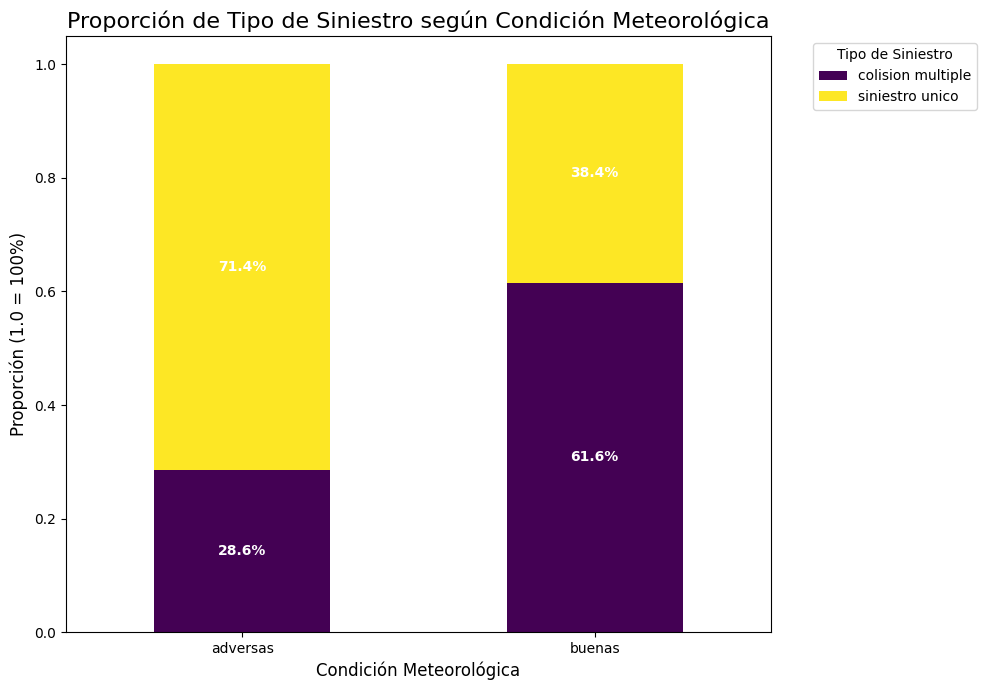

In [17]:
# Calculamos proporciones (cada fila suma 100%)
proporciones = contingencia.apply(lambda x: x / x.sum(), axis=1)

# Graficamos
ax = proporciones.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 7), 
    colormap='viridis' # Puedes cambiar los colores
)

plt.title('Proporción de Tipo de Siniestro según Condición Meteorológica', fontsize=16)
plt.ylabel('Proporción (1.0 = 100%)', fontsize=12)
plt.xlabel('Condición Meteorológica', fontsize=12)
plt.xticks(rotation=0) # Dejar etiquetas 'Buenas' y 'Adversas' horizontales
plt.legend(title='Tipo de Siniestro', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadimos etiquetas de porcentaje
for c in ax.containers:
    labels = [f'{v*100:.1f}%' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

---
## HIPÓTESIS MULTIVARIADAS
### Hipotesis 6: Existen diferencias significativas en la mediana de LESIONADOS entre los distintos TIPOS DE SINIESTRO, pero esta diferencia es particularmente pronunciada en siniestros que involucran al menos una moto en comparación con aquellos que no involucran ninguna.

Vamos a hacer One Hot Encoding, para crear una nueva columna donde con 1 indicamos que en el siniestro hubo involucrada al menos una moto o 0 si es que no hubo motos involucradas.

A partir de este nuevo DataFrames con la columna "con_moto" creamos dos DataFrames, uno donde almacenamos todos los siniestros con motos involucradas y otros sin motos involucradas.

In [18]:
motos_dataset = preprocessed_dataset.copy()

# Creamos una nueva columna 'con_moto' (Z) 
# 1 si MOTO > 0 (al menos una moto participó)
# 0 si MOTO == 0 (ninguna moto participó)
motos_dataset['con_moto'] = np.where(motos_dataset['MOTO'] > 0, 1, 0)

# Creamos los dos DataFrames para el análisis
df_con_moto = motos_dataset[motos_dataset['con_moto'] == 1].copy()
df_sin_moto = motos_dataset[motos_dataset['con_moto'] == 0].copy()

print(f"Total de siniestros CON moto (Z=1): {len(df_con_moto)}")
print(f"Total de siniestros SIN moto (Z=0): {len(df_sin_moto)}")

Total de siniestros CON moto (Z=1): 167
Total de siniestros SIN moto (Z=0): 310


A cada uno de los DataFrames vamos a hacerle el test de Kruskal–Wallis para comparar los grupos.

In [19]:
# TEST 1: Siniestros CON MOTO (Z=1)
# Comparamos Y (LESIONADOS) vs. X (TIPO DE SINIESTRO)
print("\nTest 1: Siniestros CON MOTO")

# Creamos una lista de los arrays de 'LESIONADOS' para cada 'TIPO DE SINIESTRO'
# (esto es lo que espera la función de scipy.stats.kruskal)
grupos_con_moto = [
    df_con_moto[df_con_moto['TIPO DE SINIESTRO'] == tipo]['LESIONADOS']
    for tipo in df_con_moto['TIPO DE SINIESTRO'].unique()
]

# Aplicamos el test
stat_con_moto, p_con_moto = stats.kruskal(*grupos_con_moto)

print(f"  Estadístico H (Con Moto): {stat_con_moto:.4f}")
print(f"  p-valor (Con Moto): {p_con_moto:.4f}")

if p_con_moto < 0.05:
    print("  Resultado: ¡Significativo! Existen diferencias en la mediana de lesionados entre los tipos de siniestro cuando hay moto.")
else:
    print("  Resultado: No significativo. No hay evidencia de diferencias cuando hay moto.")


# TEST 2: Siniestros SIN MOTO (Z=0)
# Comparamos Y (LESIONADOS) vs. X (TIPO DE SINIESTRO)
print("\nTest 2: Siniestros SIN MOTO")

# Repetimos el proceso para el otro DataFrame
grupos_sin_moto = [
    df_sin_moto[df_sin_moto['TIPO DE SINIESTRO'] == tipo]['LESIONADOS']
    for tipo in df_sin_moto['TIPO DE SINIESTRO'].unique()
]

# Aplicamos el test
stat_sin_moto, p_sin_moto = stats.kruskal(*grupos_sin_moto)

print(f"  Estadístico H (Sin Moto): {stat_sin_moto:.4f}")
print(f"  p-valor (Sin Moto): {p_sin_moto:.4f}")

if p_sin_moto < 0.05:
    print("  Resultado: ¡Significativo! Existen diferencias en la mediana de lesionados entre los tipos de siniestro cuando no hay moto.")
else:
    print("  Resultado: No significativo. No hay evidencia de diferencias cuando no hay moto.")

# INTERPRETACIÓN FINAL (Respuesta a la Hipótesis Multivariada)
print("\nConclusión de la Hipótesis")
print(f"Comparación del Estadístico H: (Con Moto: {stat_con_moto:.2f}) vs (Sin Moto: {stat_sin_moto:.2f})")

if p_con_moto < 0.05 and p_sin_moto > 0.05:
    print("La hipótesis se confirma. El tipo de siniestro solo afecta a los lesionados si hay una moto involucrada.")
elif p_con_moto < 0.05 and p_sin_moto < 0.05 and stat_con_moto > stat_sin_moto:
    print("La hipótesis se confirma. El tipo de siniestro siempre afecta, pero la magnitud de la diferencia es mayor cuando hay una moto.")
else:
    print("No se encontró evidencia de que el efecto sea 'particularmente pronunciado' en siniestros con moto.")


Test 1: Siniestros CON MOTO
  Estadístico H (Con Moto): 2.1531
  p-valor (Con Moto): 0.7076
  Resultado: No significativo. No hay evidencia de diferencias cuando hay moto.

Test 2: Siniestros SIN MOTO
  Estadístico H (Sin Moto): 6.1409
  p-valor (Sin Moto): 0.1050
  Resultado: No significativo. No hay evidencia de diferencias cuando no hay moto.

Conclusión de la Hipótesis
Comparación del Estadístico H: (Con Moto: 2.15) vs (Sin Moto: 6.14)
No se encontró evidencia de que el efecto sea 'particularmente pronunciado' en siniestros con moto.
